In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics.pairwise import cosine_distances, euclidean_distances

In [2]:
def heatmap(X, labels=None, lns=None):
    if labels is None:
        labels = ["P{}{}".format(i, t) for i in range(1, 5) for t in ["Main"] + ["Pert{}".format(j) for j in range(1,4)] ]
    if lns is None:
        lns = [-0.48] + [3.5 + 4 * i for i in range(3)] + [15.48]
    matplotlib.rcParams.update({'font.size': 16})
    fig, ax = plt.subplots(figsize=(12,8))
    im = ax.imshow(X, cmap=plt.get_cmap('YlOrBr'))
    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    ax.hlines(lns, *ax.get_xlim(), colors='#1F77B4', lw=2)
    ax.vlines(lns, *ax.get_xlim(), colors='#1F77B4', lw=2)
    cbar = ax.figure.colorbar(im, ax=ax)
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    #fig.tight_layout()
    plt.show()

# Graph edit matching

In [3]:
df = pd.read_excel("results_graphmatching_distinct.xlsx", sheet_name='res', header=0)

In [4]:
df.head()

,P1Main,P1Pert1,P1Pert2,P1Pert3,P2Main,P2Pert1,P2Pert2,P2Pert3,P3Main,P3Pert1,P3Pert2,P3Pert3,P4Main,P4Pert1,P4Pert2,P4Pert3
P1Main,0.947455,0.981996,0.908787,0.857279,0.752012,0.744431,0.745183,0.757529,0.753951,0.745847,0.766735,0.758601,0.782482,0.805689,0.798432,0.786850
P1Pert1,0.943313,1.000000,0.858808,0.906977,0.768701,0.751678,0.759113,0.752544,0.746703,0.750750,0.763616,0.769564,0.782462,0.779517,0.784630,0.800409
P1Pert2,0.831185,0.889418,0.897580,0.918595,0.738500,0.587817,0.763545,0.769066,0.735437,0.754881,0.761279,0.766243,0.756995,0.759043,0.587787,0.775295
P1Pert3,0.859536,0.872735,0.844537,0.936499,0.757739,0.763160,0.742964,0.757285,0.729235,0.753887,0.758172,0.766886,0.774200,0.786745,0.795374,0.803459
P2Main,0.750946,0.756239,0.747848,0.763421,1.000000,0.989253,0.947222,0.950641,0.728303,0.742282,0.763711,0.764479,0.747181,0.752876,0.761975,0.763479


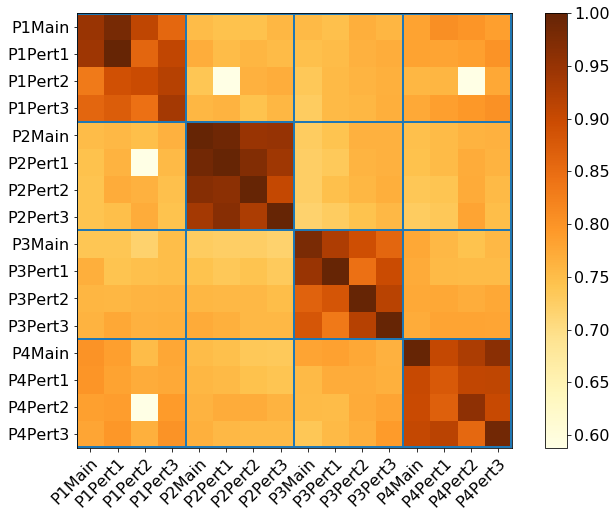

In [5]:
heatmap(df)

# Log2Vec

In [6]:
from gensim.models import Doc2Vec
from loadRandomWalks import get_doc_list as get_doc_list_model
from loadXES import get_doc_list as get_doc_list_log

c:\users\seppe\anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [163]:
model = Doc2Vec.load('output/generated_1000L2VVS16.model')
docs = get_doc_list_log('generated_1000')
df_log = pd.DataFrame.from_records([model.docvecs[tag] for tag in docs], 
        index=[d.replace('input/generated_1000/', '').replace('.1000.xes', '') for d in docs])
df_log

Found 16 documents under the dir generated_1000 .....


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
P1Main,-0.025957,0.011646,0.024865,-0.029119,-0.006729,-0.009274,-0.018758,-0.000358,-0.021698,-0.028006,0.020138,-0.005519,-0.010995,0.029209,-0.010826,0.024294
P1Pert1,0.015963,0.012401,0.003735,-0.020593,0.025199,0.028730,0.017650,-0.003249,0.004176,-0.029205,-0.023144,-0.006502,0.017885,0.009678,0.013269,0.024030
P1Pert2,-0.028471,-0.018748,0.012577,-0.013787,-0.026884,-0.006896,-0.005958,0.009710,0.022679,-0.004537,-0.008334,0.005068,0.004726,0.022446,0.013686,0.019116
P1Pert3,0.023724,-0.011947,0.004613,0.028922,0.001684,-0.019701,0.019558,-0.007855,0.000040,0.007245,0.002622,0.002329,-0.013868,-0.022228,-0.006860,0.024634
P2Main,-0.003383,-0.001212,-0.013684,0.020198,0.024433,0.019691,-0.007479,0.010124,0.009387,0.000689,-0.008584,-0.023341,0.028081,-0.011113,-0.029020,0.012867
P2Pert1,-0.010867,0.017202,-0.018104,0.030782,0.012965,0.021680,-0.021147,-0.026650,-0.024677,-0.023005,-0.020082,0.026354,0.009291,-0.006095,-0.022964,0.001746
P2Pert2,-0.011944,0.014407,-0.019238,0.004668,0.011178,0.028929,0.027477,0.018627,-0.026717,-0.029478,-0.019580,-0.005843,0.019397,0.010856,-0.018651,0.016035
P2Pert3,0.020570,0.014715,0.007304,-0.012517,-0.000808,0.008298,0.006323,-0.028358,0.009014,-0.014364,-0.021013,0.023071,-0.008026,-0.014788,-0.014824,0.020309
P3Main,0.016437,0.021804,-0.007993,-0.029895,0.021770,0.004831,0.004410,-0.022831,0.003504,0.000291,-0.002651,0.007897,0.023300,0.018731,0.015033,-0.014391
P3Pert1,0.030001,0.007975,-0.016475,0.003210,0.007460,-0.007285,0.020099,0.024199,0.007864,0.007866,-0.015733,0.003877,-0.023494,-0.004427,0.016434,0.015956


In [7]:
model = Doc2Vec.load('output/PLG2StructuralM2VVS16.model')
docs = get_doc_list_model('PLG2', 'Structural')
df_mdl = pd.DataFrame.from_records([model.docvecs[tag] for tag in docs], 
        index=[d.replace('input/PLG2/Structural/', '').replace('.txt', '') for d in docs])
df_mdl.head()

Found 16 documents under the dir PLG2 .....


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
P1Main,1.015734,0.799128,-0.869734,0.020552,-1.168080,0.804783,0.931901,-0.023602,-1.609155,-0.882650,-0.393869,0.155599,-0.626145,-1.183918,-0.134020,-1.131467
P1Pert1,-0.101390,0.148152,0.036598,-0.657886,0.638106,1.195020,1.514060,-0.648127,-1.487544,-0.567995,-0.845676,-0.373757,-1.636607,-0.903848,-0.474182,-0.634046
P1Pert2,-0.963205,0.314135,0.549171,0.583860,-0.897731,1.385079,1.333842,-0.240480,-1.849116,-1.690863,0.675560,0.503348,-0.086466,0.481443,0.567283,-0.364794
P1Pert3,-0.439587,1.316293,0.066394,0.700098,-1.673072,0.422129,0.570800,-0.691031,-0.225143,-1.316837,-1.573925,-0.194060,-1.199999,-0.682005,0.394520,-0.718362
P2Main,-0.060173,1.327940,1.689235,0.369499,-0.530888,0.785839,1.133459,1.436288,-0.434991,0.071003,0.032159,-0.274994,0.032446,-0.267518,-1.478744,-1.025856


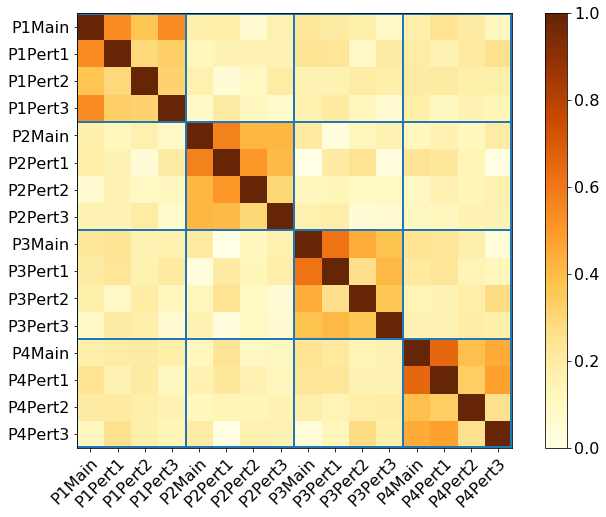

In [8]:
res = cosine_distances(df_mdl)
res = 1 - res / np.max(res)
heatmap(res)

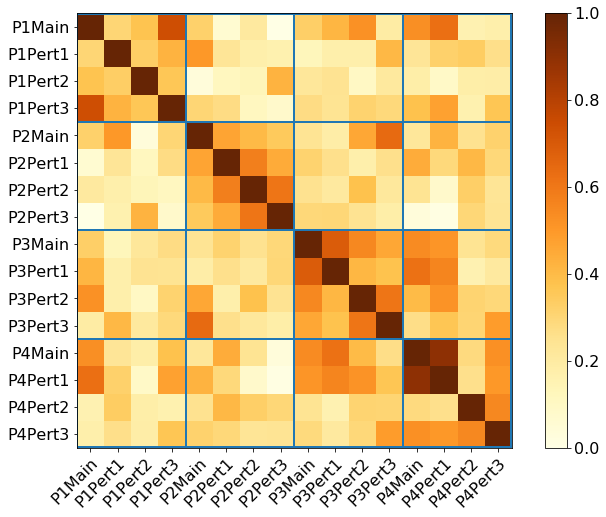

In [174]:
df_c = pd.concat([df_mdl, df_log], axis=1)

res = cosine_distances(df_c)
res = 1 - res / np.max(res)
heatmap(res)

# Trying trace averaging approach

In [107]:
model = Doc2Vec.load('output/generated_1000L2VVS128.model')
docs = get_doc_list_log('generated_1000')

Found 16 documents under the dir generated_1000 .....


In [117]:
def get_keys():
    l = []
    for key in model.docvecs.doctags.keys():
        keys = key.split('.xes')
        if keys[1] == '': continue
        l.append([key, keys[0] + '.xes', keys[1]])
    return l

df_tr = pd.DataFrame.from_records([model.docvecs[tag[0]] for tag in get_keys()])
df_in = pd.DataFrame.from_records([tag[1:] for tag in get_keys()], columns=['log', 'trace'])
df_tr = pd.concat([df_in, df_tr], axis=1)
df_tr.head()

,log,trace,0,1,2,3,4,5,6,7,...,118,119,120,121,122,123,124,125,126,127
0,input/generated_1000/P1Main.1000.xes,0,-0.106606,-0.200823,0.159207,-0.107473,-0.118012,-0.330730,0.139294,0.280812,...,0.448390,-0.207165,-0.422918,-0.187104,-0.097338,-0.290235,-0.418284,-0.195707,-0.107293,-0.055206
1,input/generated_1000/P1Main.1000.xes,1,0.303639,0.226307,0.160984,-0.243124,0.004845,-0.011203,-0.359800,-0.027685,...,0.616358,-0.413838,0.186222,0.268496,0.157975,-0.371614,-0.060326,-0.456851,-0.104286,0.026670
2,input/generated_1000/P1Main.1000.xes,2,0.327776,-0.239212,0.188665,-0.085008,-0.011161,-0.292300,-0.026570,0.209137,...,0.425358,-0.483438,-0.322945,-0.287891,0.297572,-0.282038,-0.179633,-0.461129,-0.265827,0.370954
3,input/generated_1000/P1Main.1000.xes,3,-0.089436,0.184108,0.249855,0.182297,-0.003021,-0.431744,0.036817,0.150482,...,0.687305,-0.172259,-0.284504,0.023262,-0.035138,-0.453400,-0.224895,-0.227059,-0.150170,0.209148
4,input/generated_1000/P1Main.1000.xes,4,0.248085,-0.155990,0.055111,-0.204007,-0.105172,-0.167737,0.030638,0.221558,...,0.265777,-0.366906,-0.239565,-0.108411,0.048676,-0.161514,-0.320319,-0.295924,-0.211417,0.169831


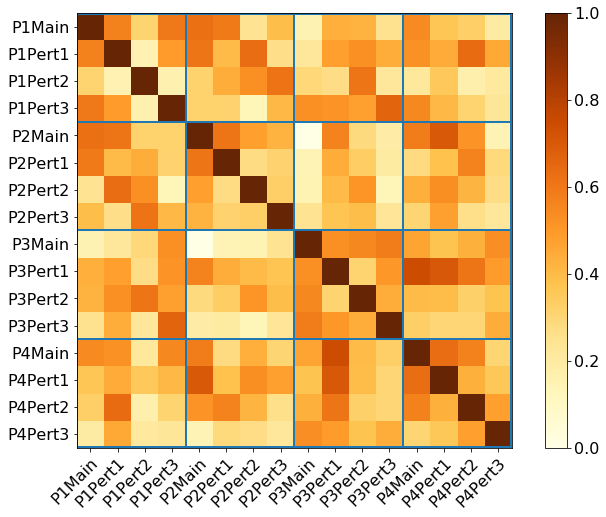

In [126]:
df_trr = df_tr.groupby(['log']).agg(lambda x: x.mean()).drop(['trace'], axis=1)
res = cosine_distances(df_trr)
res = 1 - res / np.max(res)
heatmap(res)
